# 1- Variance Threshold

In [1]:
import numpy as np
import pandas as pd
from sklearn.feature_selection import VarianceThreshold
from sklearn.datasets import load_iris

# Load the dataset
data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)

# Apply Variance Threshold
threshold = 0.2  # You can set the threshold as needed
selector = VarianceThreshold(threshold)
X_reduced = selector.fit_transform(X)

print("Original features:", X.columns)
print("Selected features after Variance Threshold:", X.columns[selector.get_support()])

Original features: Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')
Selected features after Variance Threshold: Index(['sepal length (cm)', 'petal length (cm)', 'petal width (cm)'], dtype='object')


# 2- correlation coefficient

1- Pearson Correlation Coefficient: Measures linear relationships between continuous variables.

2- Spearman's Rank Correlation Coefficient: Measures the strength and direction of a monotonic relationship between two ranked variables.

3- Kendall's Tau: Measures the strength of association between two variables based on the ranks of the data.

4- Point-Biserial Correlation: Used when one variable is continuous, and the other is binary.

Selected features based on Correlation Coefficient: Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')


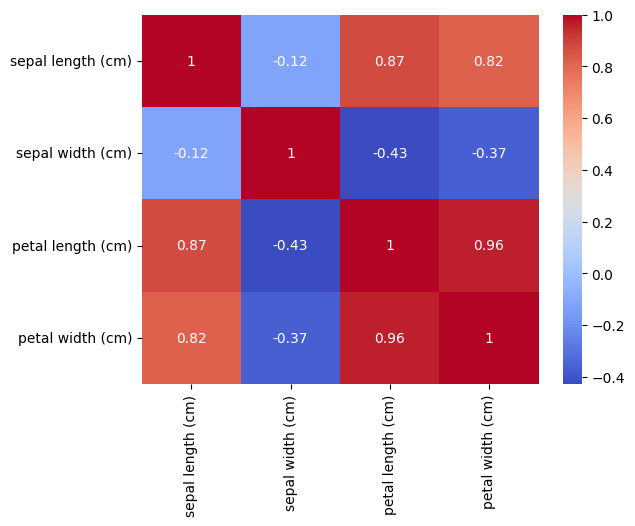

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name='target')

# Calculate correlation matrix
corr_matrix = X.corr()

# Select features with a correlation higher than 0.5 with the target
selected_features = corr_matrix.columns[corr_matrix.abs().max() > 0.5]

print("Selected features based on Correlation Coefficient:", selected_features)

# Optional: Visualize the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


Pearson Correlation Coefficient Matrix:
                   sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)           1.000000         -0.076997           0.718516   
sepal width (cm)           -0.076997          1.000000          -0.185994   
petal length (cm)           0.718516         -0.185994           1.000000   
petal width (cm)            0.655309         -0.157126           0.806891   

                   petal width (cm)  
sepal length (cm)          0.655309  
sepal width (cm)          -0.157126  
petal length (cm)          0.806891  
petal width (cm)           1.000000  


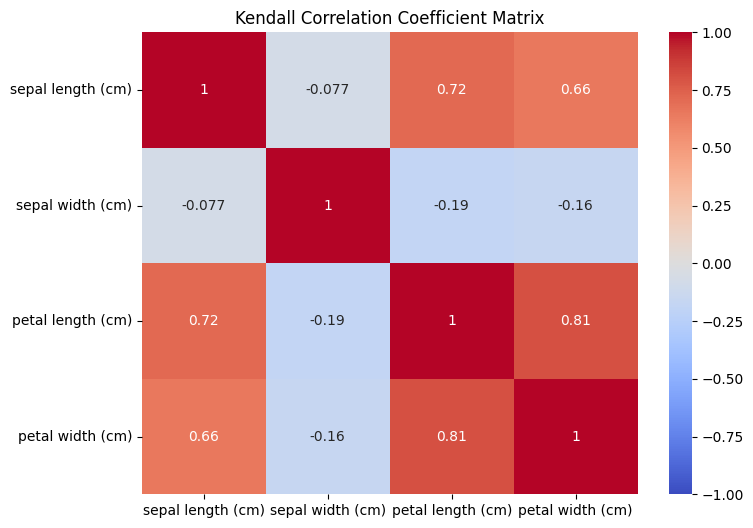

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Load the dataset
data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)

# Calculate Pearson correlation matrix
corr_matrix = X.corr(method='kendall')

print("Pearson Correlation Coefficient Matrix:")
print(corr_matrix)

# Visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Kendall Correlation Coefficient Matrix')
plt.show()


# 3- Chi-Square Test

a- The Chi-Square test is a statistical test that measures the association between categorical variables. Specifically, it is used to test whether two categorical variables are independent or not. For the Chi-Square test to be valid, the data should be in a categorical form.

b- Binarization is the process of converting continuous or numerical data into binary values, typically 0 and 1. This process is also known as thresholding, where a threshold value is set, and any value above that threshold is converted to 1, while any value below it is converted to 0.

c- When you have continuous or ordinal data (like the numerical features in the Iris dataset), it’s not directly suitable for a Chi-Square test because Chi-Square assumes categorical data (e.g., counts of occurrences). 

d- Binarizing the data converts the continuous features into categorical form, making them suitable for the Chi-Square test.

In [3]:
from sklearn.feature_selection import chi2
from sklearn.preprocessing import Binarizer
from sklearn.feature_selection import SelectKBest

# Binarize the data to make it suitable for the Chi-square test
X_binarized = Binarizer().fit_transform(X)

# Apply Chi-square test
chi2_selector = SelectKBest(chi2, k=2)  # Select top 2 features
X_reduced = chi2_selector.fit_transform(X_binarized, y)

print("Selected features based on Chi-Square Test:", X.columns[chi2_selector.get_support()])


Selected features based on Chi-Square Test: Index(['petal length (cm)', 'petal width (cm)'], dtype='object')


# 4- Mutual Information

In [4]:
from sklearn.feature_selection import mutual_info_classif

# Apply Mutual Information
mi = mutual_info_classif(X, y)
mi_series = pd.Series(mi, index=X.columns).sort_values(ascending=False)

print("Mutual Information scores:")
print(mi_series)


Mutual Information scores:
petal width (cm)     0.993112
petal length (cm)    0.992999
sepal length (cm)    0.470400
sepal width (cm)     0.255602
dtype: float64


# 5- ANOVA F-test

In [5]:
from sklearn.feature_selection import f_classif

# Apply ANOVA F-test
f_values, p_values = f_classif(X, y)
f_values_series = pd.Series(f_values, index=X.columns).sort_values(ascending=False)

print("ANOVA F-values:")
print(f_values_series)


ANOVA F-values:
petal length (cm)    1180.161182
petal width (cm)      960.007147
sepal length (cm)     119.264502
sepal width (cm)       49.160040
dtype: float64


# 6- Information Gain

In [6]:
from sklearn.feature_selection import mutual_info_classif

# Information Gain is similar to Mutual Information
# Apply Mutual Information as a proxy for Information Gain
mi = mutual_info_classif(X, y)
mi_series = pd.Series(mi, index=X.columns).sort_values(ascending=False)

print("Information Gain (approximated by Mutual Information):")
print(mi_series)


Information Gain (approximated by Mutual Information):
petal length (cm)    0.984666
petal width (cm)     0.984133
sepal length (cm)    0.492970
sepal width (cm)     0.237605
dtype: float64


# 7- Univariate Feature Selection

In [7]:
from sklearn.feature_selection import SelectKBest, f_classif

# Apply Univariate Feature Selection (ANOVA F-test in this case)
kbest_selector = SelectKBest(f_classif, k=2)
X_reduced = kbest_selector.fit_transform(X, y)

print("Selected features based on Univariate Feature Selection (ANOVA):", X.columns[kbest_selector.get_support()])


Selected features based on Univariate Feature Selection (ANOVA): Index(['petal length (cm)', 'petal width (cm)'], dtype='object')
